In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/.dependencies/pyplot-perso")
from plttools import PltTools
path_figures = current_path # git_path + "/figures/"
path_data = git_path + "/.dependencies/lammpstutorials-inputs/"+path_in_folder.split('/')[-2]+"/"

In [3]:
color0_light = np.array([0.5, 0.5, 0.5])
color1_light = np.array([1, 0.682, 0.286])
color2_light = np.array([0.008, 0.294, 0.478])
color3_light = np.array([0.267, 0.647, 0.761])

color0_dark = np.array([0.5, 0.5, 0.5])
color1_dark = np.array([1, 0.8, 0.5])
color2_dark = np.array([0.24, 0.58, 1.0])
color3_dark = np.array([0.4, 0.75, 0.85])

colors_light = {
    "color0": color0_light,
    "color1": color1_light,
    "color2": color2_light,
    "color3": color3_light,
}

colors_dark = {
    "color0": color0_dark,
    "color1": color1_dark,
    "color2": color2_dark,
    "color3": color3_dark,
}

In [4]:
data = np.loadtxt(path_data + "shearing-water.dat", skiprows = 4)
vx = data[:,4]*1e5 # m/s
z = data[:,1]/10 # nm
rho = data[:,3]

data = np.loadtxt(path_data + "shearing-ions.dat", skiprows = 4)
vxi = data[:,4]*1e5 # m/s
zi = data[:,1]/10 # nm
rhoi = data[:,3]

data = np.loadtxt(path_data + "shearing-wall.dat", skiprows = 4)
vxw = data[:,4]*1e5 # m/s
zw = data[:,1]/10 # nm
rhow = data[:,3]

rhof = rho+rhoi
vxf = (vx+vxi)/2

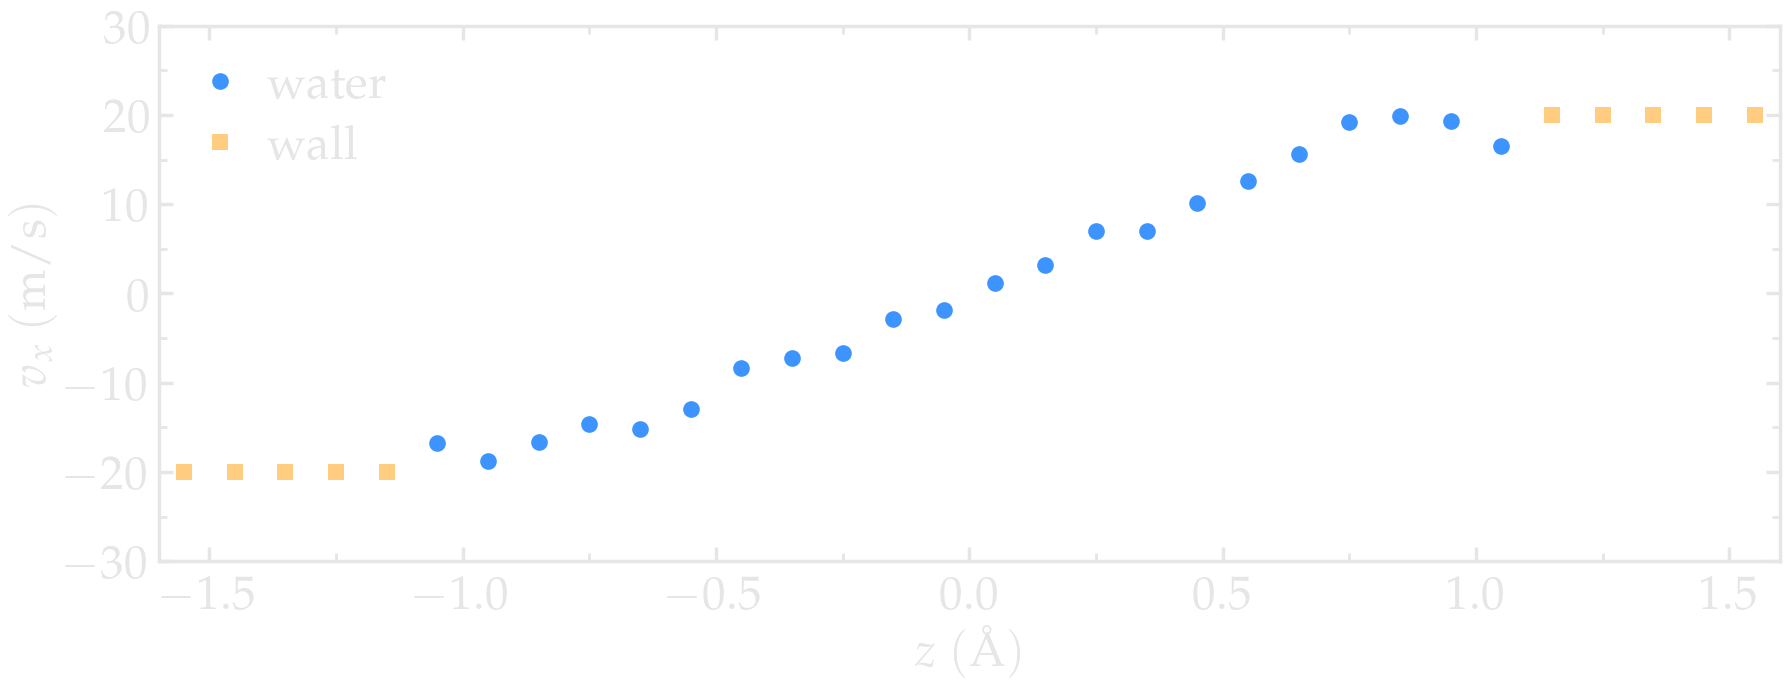

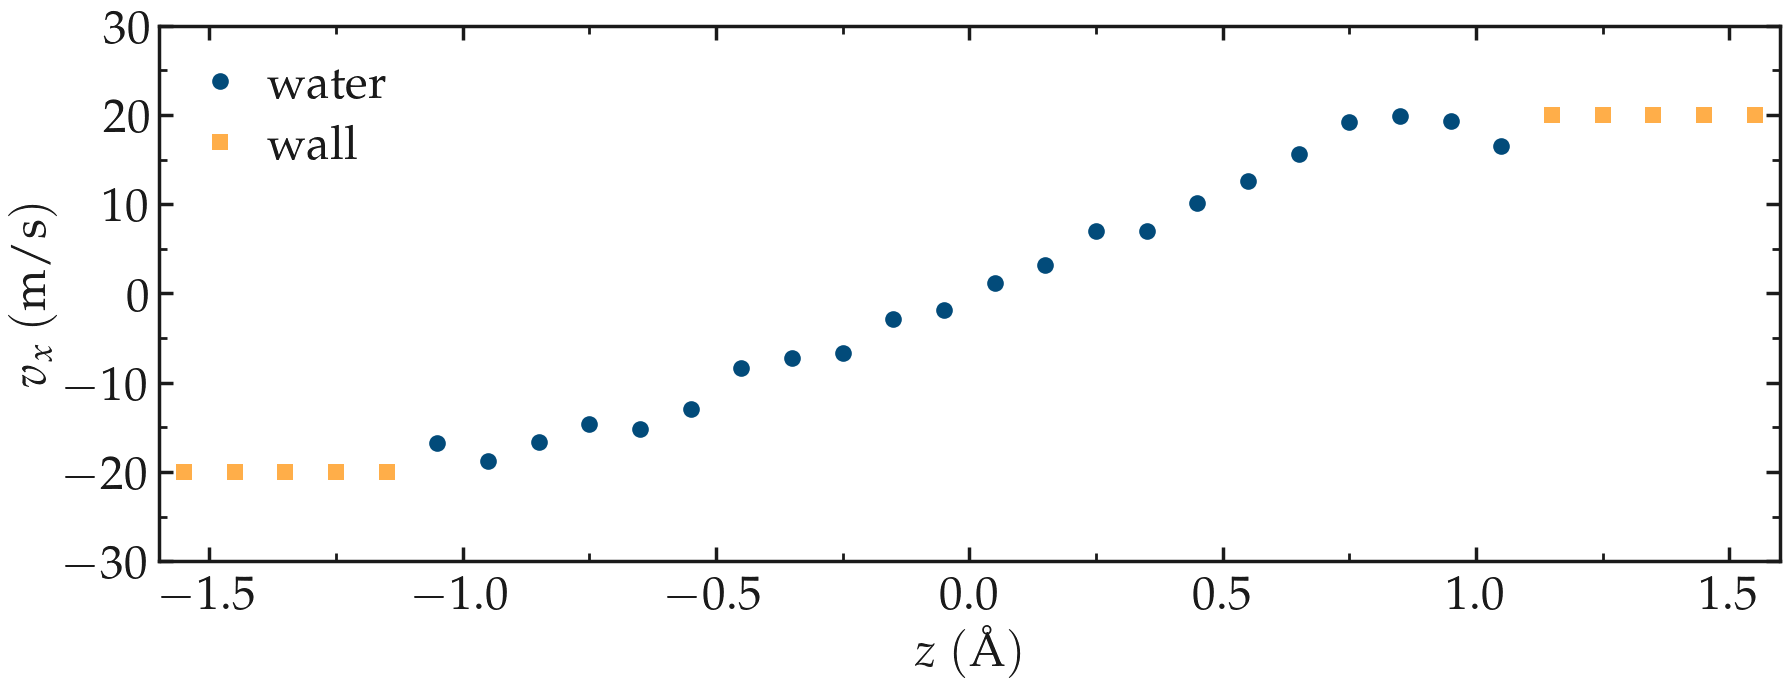

In [5]:
filename = "NANOSHEAR-profiles"

for dark_mode in [True, False]:

    colors = colors_dark if dark_mode else colors_light
    globals().update(colors)

    # Initialise figure
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,7), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_colone=1)

    # Panel a
    #myplt.add_panel()
    #myplt.add_plot(x = z[rho>0], y = rho[rho>0], type = "plot", linewidth_data = 3,
    #               marker = "o-", data_color = color2, markersize = 12)
    #myplt.complete_panel(ylabel = r'$\rho ~ \mathrm{(g/mol/\AA{}^3)}$',
    #                     xlabel = None, xpad = 10, legend=True, handlelength_legend=1)
    #myplt.set_boundaries(x_ticks=np.arange(-1.5, 1.6, 0.5), y_ticks=np.arange(0, 1.81, 0.4),
    #                    x_boundaries=(-1.6, 1.6), y_boundaries=(-0.2, 1.8))

    # Panel b
    myplt.add_panel()
    myplt.add_plot(x = z[rho>0], y = vx[rho>0], type = "plot", linewidth_data = 3,
                marker = "o", data_color = color2, markersize = 12, data_label=r"$\mathrm{water}$")
    myplt.add_plot(x = zw[rhow>0], y = vxw[rhow>0], type = "plot", linewidth_data = 3,
                marker = "s", data_color = color1, markersize = 12, data_label=r"$\mathrm{wall}$")
    myplt.complete_panel(ylabel = r'$v_x ~ \mathrm{(m/s)}$',
                        xlabel = r'$z~\mathrm{(\AA{})}$',
                        xpad = 10, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(-1.5, 1.6, 0.5), y_ticks=np.arange(-30, 35, 10),
                        x_boundaries=(-1.6, 1.6), y_boundaries=(-25, 25))

    # Print figure
    # myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = path_figures)

#### The next lines estimate the viscosity from the stress applied by the fluid on the walls.

In [47]:
log = lammps_logfile.File("shearing.log")

A = 6e-18 # m2 -- (12.12*2e-10)**2 -- surface area of the wall
tau_1 = np.mean(log.get("f_mysf1[1]", run_num=0)[200:]) # force on wall in kcal/mol/A
tau_2 = np.mean(log.get("f_mysf2[1]", run_num=0)[200:]) # force on wall kcal/mol/A
total_stress = (tau_2-tau_1)*4184/6.022e23*1e10/A # stress in Newton
print("stress=", total_stress, "Pa") # Pa
gamma_dot = 20e9 # s-1
eta = total_stress/gamma_dot
print("viscosity=", total_stress, "Pa s") # Pa


stress= 62861550.60553605 Pa
viscosity= 62861550.60553605 Pa s
